## IDEA

### A single time user(Customer) will make the most use of the citibike within his timelimit than a subscriber

## Null Hypothesis ($H_0$)

The mean trip duration of single time user (customer) is less than or equal to the mean trip duration of the subscribers.

H0 : T(customer) <= T(subscriber)

## Alternate Hypothesis ($H_a$)

The mean trip duration of single time user (customer) is more than the mean trip duration of the subscribers.

$H_a$: T(customer) > T(subscriber)

## Significance Threshold:

α = 0.05

In [101]:
import datetime 
import calendar

my_date = datetime.datetime(2016, 9 , 25)
calendar.day_name[my_date.weekday()]

'Sunday'

In [102]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


In [103]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [104]:
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [105]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [106]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [107]:
df.drop(['starttime','stoptime','start station id',
       'start station name','start station latitude',
       'start station longitude','end station id','end station name',
       'end station latitude','end station longitude','bikeid',
       'birth year','gender'], axis = 1, inplace = True)

In [108]:
df.head()

,tripduration,usertype,date
0,1470,Subscriber,2016-06-01 00:00:18
1,229,Subscriber,2016-06-01 00:00:20
2,344,Subscriber,2016-06-01 00:00:21
3,1120,Subscriber,2016-06-01 00:00:28
4,229,Subscriber,2016-06-01 00:00:53


In [111]:
fig=pl.figure(figsize(5,5))
users_mean = df.groupby(['usertype']).mean()

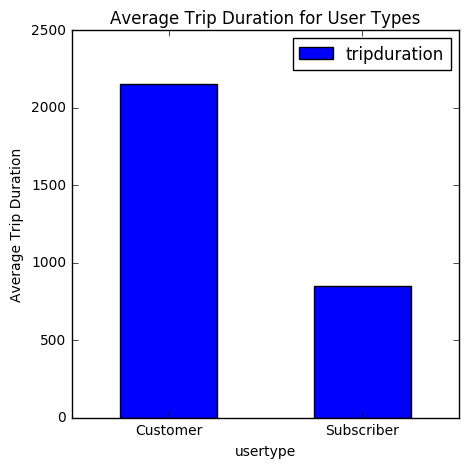

In [112]:
users_mean.plot(kind='bar',rot=360)
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for User Types')

In [113]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()

(0, 4000)

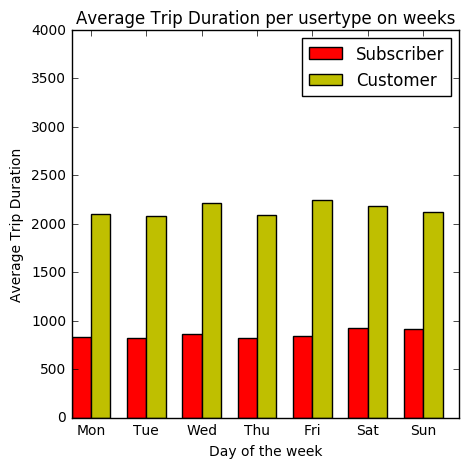

In [114]:
fig, ax = pl.subplots()

width = 0.35  
rects1 = ax.bar( sub.index.values , sub.tripduration, width, color='r')
rects2 = ax.bar(cus.index.values + width, cus.tripduration, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weeks')
ax.set_xticks(cus.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))
pl.ylim(0,4000)